# Customer Churn Analysis Using Python : Uncovering Drivers of Churn

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('projects/customer churn/Customer Churn.csv')

In [4]:

df.shape

(7043, 21)

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total charges coulmn datatype is supposed to be float not object.However there is a blank space in the column which need to be addressed before changing data type

In [30]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')

In [31]:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [32]:
df['TotalCharges'].dtypes

dtype('float64')

In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

Double check duplicate values on basis of unique column in the data

In [35]:
df['customerID'].duplicated().sum()

np.int64(0)

In [36]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'yes', 0: 'no'})


In [37]:
df['SeniorCitizen']

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

In [38]:
bins=[0,30,60,90,120]
labels=['0-15','16-30','31-60','61-90']

df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# 1. Customer Churn Distribution


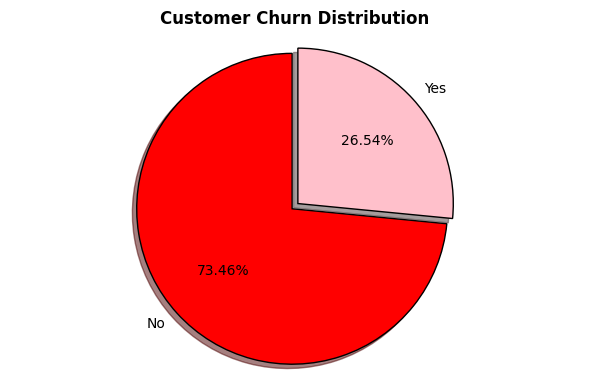

In [39]:
plt.figure(figsize=(6, 4)) 

churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct='%1.2f%%',  #2 decimal places
        startangle=90,
        colors=['red', 'pink'],  
        explode=[0.05, 0], 
        shadow=True,
        wedgeprops={'edgecolor': 'black'}) #slice seperation

plt.title('Customer Churn Distribution', fontsize=12, weight='bold')
plt.axis('equal')  #  ensures pie is circular
plt.tight_layout()
plt.show() 


**Insight**:
* 26.54% of customers have churned.
* 73.46% of customers have remained loyal.

**Interpretation:**
*  While a majority of customers are retained, the churn rate is still significant.
*  Losing over 1 in 4 customers can have a substantial impact on revenue and growth.
*  This warrants further analysis into why customers are leaving and how to prevent it.

**Recommendation:**
*  Focus on understanding churn drivers ( high charges, poor support, short contracts,etc.).
*  Investigate if churn is concentrated in specific customer segments (seniors, monthly users, etc.).


# 2.Churn Rate by Gender

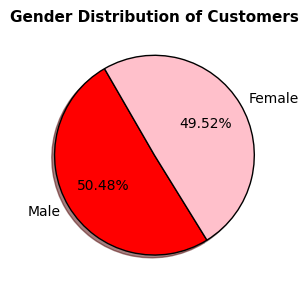

In [40]:
plt.figure(figsize=(5, 3))
df['gender'].value_counts().plot.pie(
    autopct='%1.2f%%',
    colors=['red', 'pink'],  
    startangle=120,
    wedgeprops={'edgecolor': 'black'},
    shadow=True,
    labels=['Male', 'Female']
)

plt.title('Gender Distribution of Customers', fontsize=11, weight='bold')
plt.ylabel('')  # Remove gender label
plt.tight_layout()
plt.show()


**Insight:**
* The dataset has a nearly equal distribution of male and female customers.
* This suggests there is no major gender bias in the customer base.



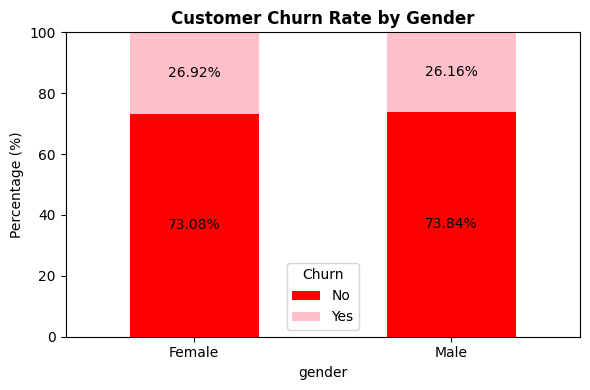

In [41]:

gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
gender_churn = gender_churn.round(2) 

gc = gender_churn.plot(
    kind='bar',
    stacked=True,
    color=['red', 'pink'],  
    figsize=(6, 4)
)

plt.title('Customer Churn Rate by Gender', fontsize=12, weight='bold')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Churn')

for container in gc.containers:
    gc.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()



**Interpretation**:
*  Churn rates are **very similar** across genders.
*  Female customers have a slightly higher churn rate (26.92%) than male customers (26.16%), but the difference is marginal (only 0.76 percentage points).
* This suggests that gender is not a strong factor influencing churn in this dataset.

**Recommendation:**
*  Focus on other variables like contract type, payment method, or service usage to find stronger churn predictors.

# 3. Churn Rate by senior sitizen status

Churn             No    Yes
SeniorCitizen              
no             76.39  23.61
yes            58.32  41.68


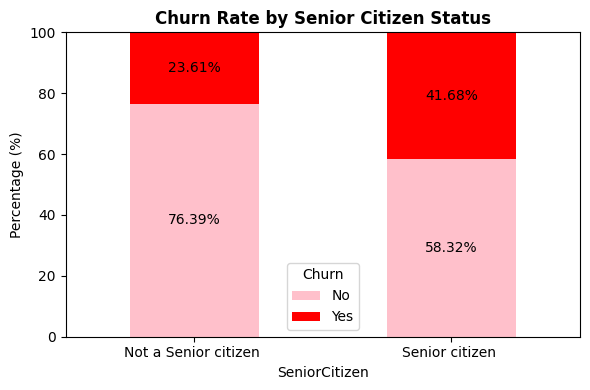

In [42]:
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_churn = senior_churn.round(2)
print(senior_churn)


sc = senior_churn.plot(kind='bar', stacked=True, color=['pink', 'red'], figsize=(6, 4))
plt.title('Churn Rate by Senior Citizen Status', fontsize=12, weight='bold')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not a Senior citizen ', 'Senior citizen '], rotation=0)
plt.ylim(0, 100)
plt.legend(title='Churn')


for container in sc.containers:
    sc.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()


**Interpretation:**
* Senior citizens are **much more likely** to churn (41.68%) compared to non-seniors (23.61%).
* This is a significant difference of 18.07 percentage points.
* Senior status is a strong predictor of customer churn in this dataset.

**Recommendation:**
*  Provide a simplified user experience for senior customers
*  Offer dedicated phone support with trained agents who handle common senior citizen's concerns
*  Create custom, affordable plans tailored to seniors

# 4.Churn Rate by Dependents

Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45


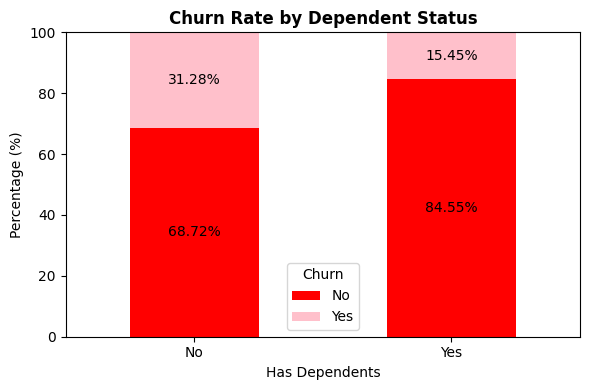

In [44]:
dependents_churn = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
dependents_churn = dependents_churn.round(2)
print(dependents_churn)

dc = dependents_churn.plot(
    kind='bar',
    stacked=True,
    color=['red', 'pink'], 
    figsize=(6, 4)
)

plt.title('Churn Rate by Dependent Status', fontsize=12, weight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Has Dependents')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Churn')

for container in dc.containers:
    dc.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()



****Interpretation:****
* Customers **without dependents** are more than twice as likely to churn.
*  Having dependents may indicate greater responsibility or a more stable lifestyle,
   making customers less likely to switch providers.

**Recommendation:**
*  Target **customers without dependents** with loyalty programs or value-added services to improve retention.
*  Consider **personalized engagement** ( exclusive offers, product bundles) for this high-risk group.

# 5.Churn Rate by tenure

Churn           No    Yes
TenureGroup              
0-15         60.74  39.26
16-30        82.41  17.59
31-60        93.39   6.61


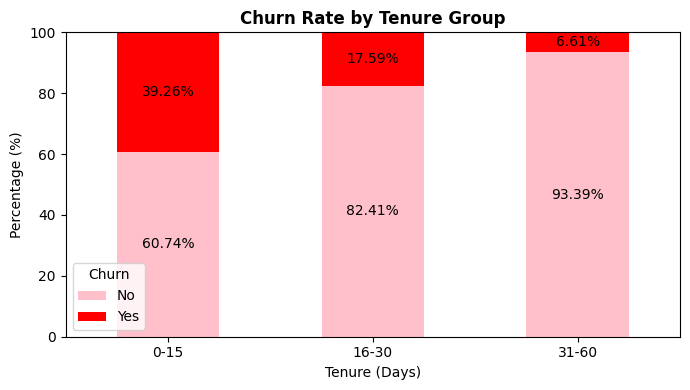

In [45]:
tenure_churn = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100
tenure_churn = tenure_churn.round(2)
print(tenure_churn)

tc = tenure_churn.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'red'],  
    figsize=(7, 4)
)

plt.title('Churn Rate by Tenure Group', fontsize=12, weight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Tenure (Days)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Churn')

for container in tc.containers:
    tc.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()



**Insights:**
* Very high churn (39.26%) occurs within the first 15 days.
* Churn significantly drops to 17.59% between 16–30 days.
* Lowest churn (6.61%) seen after 30 days indicating long-term retention.

**Recommendations:**
* Improve onboarding and first-touch experience to reduce 0–15 day churn.
* Introduce **retention offers** (e.g., discount, support) during the first month.
* Monitor early user activity to flag high-risk churn candidates quickly.



# 6.Churn Rate by contract

Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


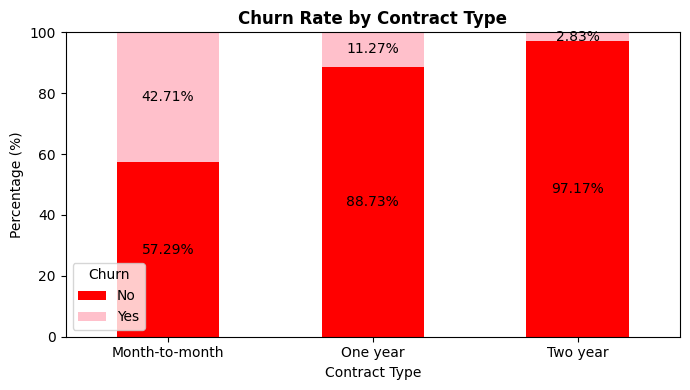

In [66]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn = contract_churn.round(2)
print(contract_churn)

cc = contract_churn.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 4),
    color=['red', 'pink']  
)

plt.title('Churn Rate by Contract Type', fontsize=12, weight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Churn')

for container in cc.containers:
    cc.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()



**Interpretation:**
* **Month-to-month contracts** have the highest churn (42.71%), indicating a lack of long-term commitment and possible dissatisfaction.
* **One-year contracts** show significantly lower churn (11.27%), suggesting better retention through longer commitment.
* **Two-year contracts** have the lowest churn (2.83%), reflecting high loyalty, satisfaction, or switching barriers.

**Recommendations:**
 * Offer discounts or benefits for customers who switch from monthly to 1 or 2-year plans.
 * Focus customer success and **marketing efforts** on month-to-month users.
 * Engage them with onboarding support, **incentives**, or loyalty programs to prevent early churn.
 * Monitor month-to-month users as a high-risk group and **track feedback**, complaints, and inactivity patterns.


# 7. Churn Rate by Payment Method

Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


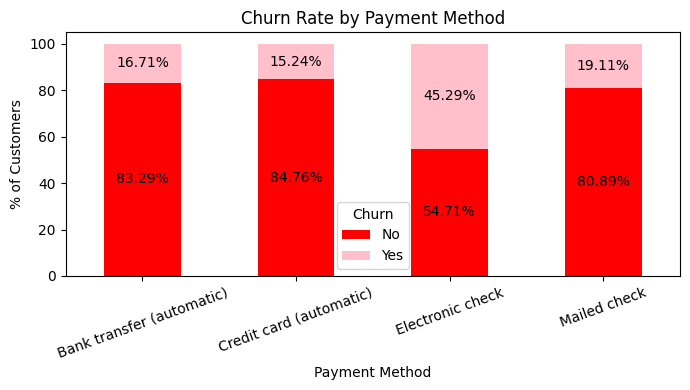

In [46]:
churn_by_payment = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
churn_by_payment = churn_by_payment.round(2)
print(churn_by_payment)

cp= churn_by_payment.plot(kind='bar', stacked=True, color=['red', 'pink'], figsize=(7, 4))
plt.title('Churn Rate by Payment Method')
plt.ylabel('% of Customers')
plt.xlabel('Payment Method')
plt.legend(title='Churn')
plt.xticks(rotation=20)

for container in cp.containers:
    cp.bar_label(container, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()




**Interpretation:**
*  **Electronic check** users have the highest churn rate (45.29%). This method may reflect less tech-savvy or lower-engagement customers.
*  **Automatic payments** (bank transfer and credit card) show significantly lower churn rates (~15–17%), suggesting that auto-pay reduces the likelihood of cancellation.
*  **Mailed check** users churn at a moderate rate (19.11%), slightly worse than automatic methods but much better than electronic check users.

**Recommendations:**
* Incentivize customers to switch to automatic payment methods (bank transfer or credit card) with small discounts or reward points.
* Monitor & Support Electronic Check Users, Consider proactive engagement like follow-up emails, loyalty rewards, or simplified onboarding.
* Make automatic payment the default method during sign-up, while still allowing changes this could passively improve retention.

# 8.Factors with possibility of impact on churn rate

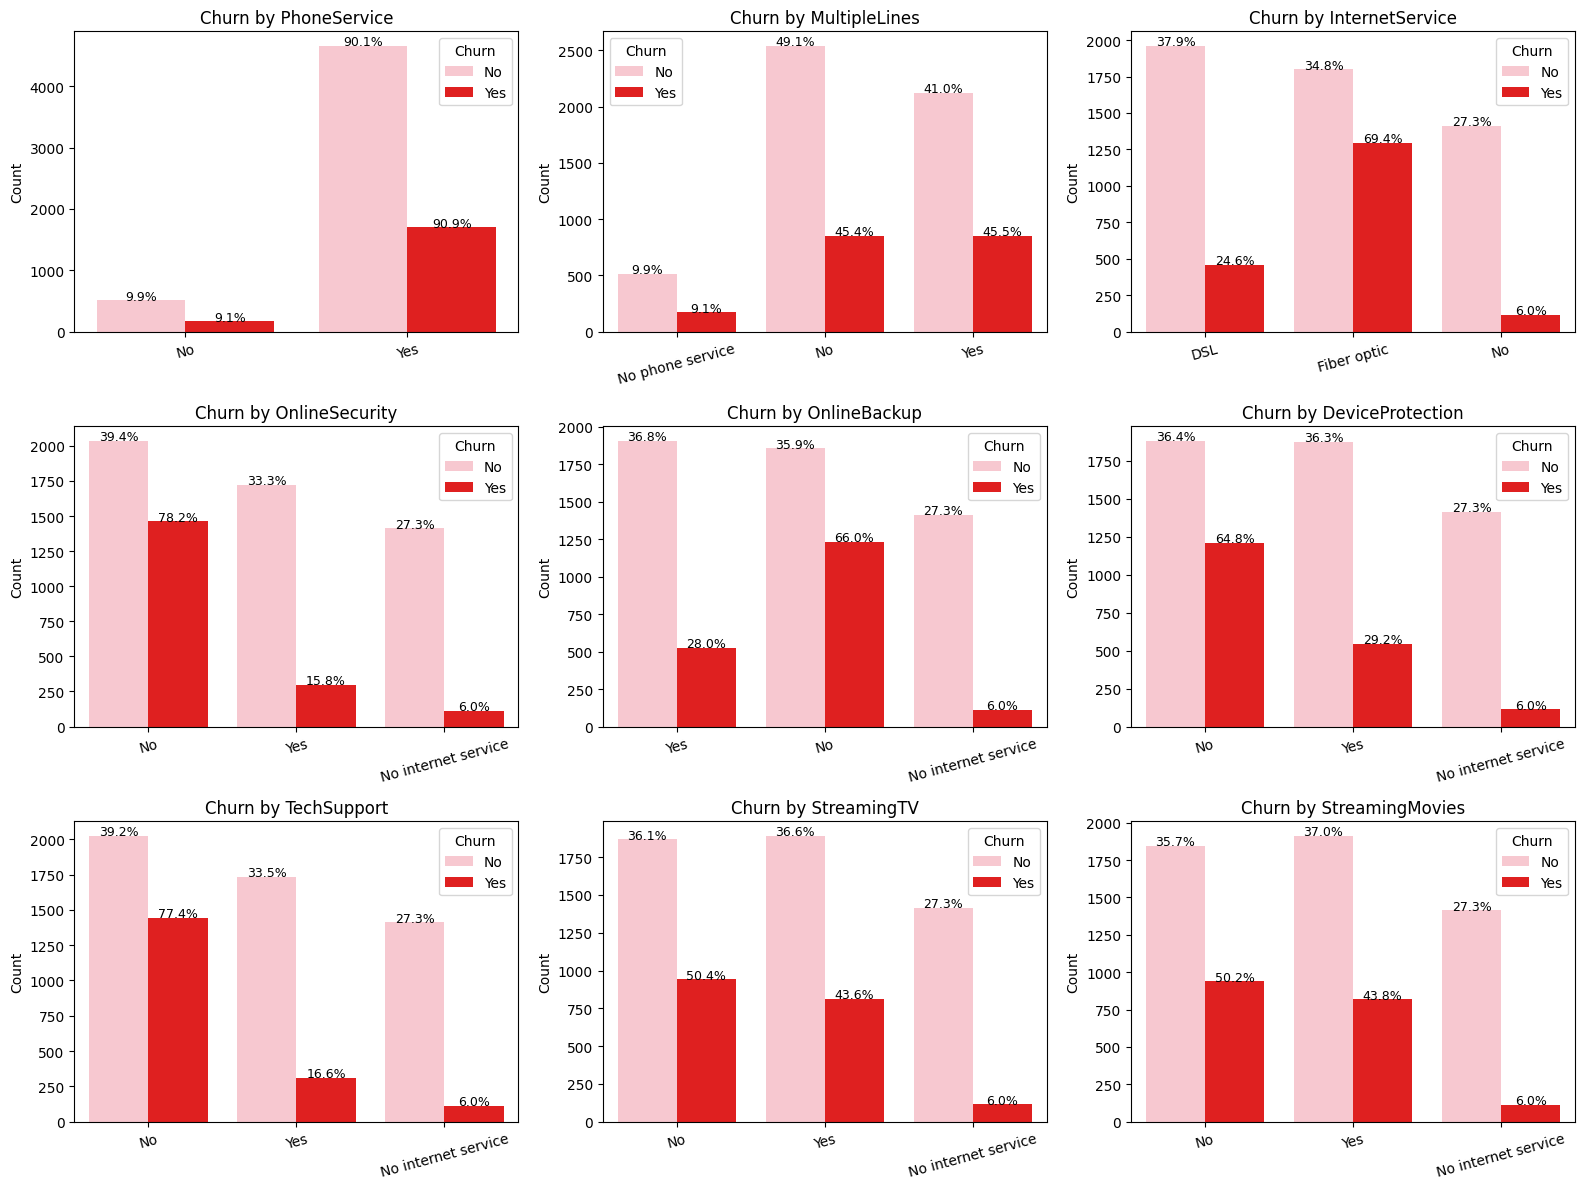

In [47]:


columns = ['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity',
           'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

num_columns = len(columns)
n_cols = 3
n_rows = (num_columns + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

colors = ['pink', 'red']  

for i, col in enumerate(columns):
    ax = axes[i]
    data = df.copy()
    
    plot = sns.countplot(data=data, x=col, hue='Churn', ax=ax, palette=colors)
    ax.set_title(f'Churn by {col}', fontsize=12)
    ax.set_ylabel('Count')
    ax.set_xlabel('')

    for container in ax.containers:
        total = sum([bar.get_height() for bar in container])
        for bar in container:
            height = bar.get_height()
            if height > 0:
                percentage = f'{100 * height / total:.1f}%'
                ax.text(bar.get_x() + bar.get_width() / 2, height + 5, percentage,
                        ha='center', fontsize=9, color='black')

    ax.tick_params(axis='x', rotation=15)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insights**

**PhoneService**
* Churn rate is nearly identical regardless of phone service (~9.1%).
* PhoneService does **not significantly** impact churn.

**MultipleLines**
* Churn rate remains similar for customers with or without multiple lines (~45%).
* MultipleLines has **minimal influence** on churn.

**InternetService**
* Fiber optic users have the highest churn rate (69.4%), DSL users lower (24.6%).
* Customers without internet service show the lowest churn (6.0%).
* Indicates fiber optic users may be dissatisfied.

**OnlineSecurity**
* Customers without OnlineSecurity churn at 78.2%, compared to 15.8% with it.
* Strong **negative correlation** with churn.

**OnlineBackup**
* 66.0% churn without backup, compared to 28.0% with it.
* OnlineBackup appears to significantly improve retention.

**DeviceProtection**
* Churn with DeviceProtection is 29.2%, without it is 64.8%.
* **Positive** retention impact from DeviceProtection.

**TechSupport**
* Customers with TechSupport churn only 16.6%, while those without churn at 77.4%.
* TechSupport is one of the **most effective** churn-reduction factors.

**StreamingTV & StreamingMovies**
* Churn differences are minimal (~43–50%) regardless of service usage.
* Limited impact on churn not a key retention factor.



**Recommendations**

**Investigate High Churn Among Fiber Optic Users**
   * Analyze root causes (e.g., pricing, service quality).
   * Offer support, promotions, or loyalty programs.

**Promote Add-on Services That Reduce Churn**
   * Encourage subscription to OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport.
   * Consider bundled packages,free trials, upgrade incentives

**Deprioritize Low-Impact Services in Churn Strategy**
   * Services like StreamingTV and StreamingMovies show minimal influence.
   * Use them to enhance bundles but not as standalone churn levers.

**Use Customer Segmentation for Targeted Campaigns**
   * Identify customers without key retention services.
   * Send targeted offers to improve retention in high-risk groups.

**Collect Feedback from Churning Segment**
   * Focus on Fiber Optic users and those not using retention-related services.
   * Use surveys and NPS scores to drive product/service improvements.





**This project analyzed customer churn using various demographic, behavioral, and service-related features. Visualizations helped identify key drivers of churn such as contract type, payment method, tenure, and value-added services.**

